In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


In [2]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25, 10]

In [5]:
entries = pd.read_csv("../data/entries.csv", dtype=dict(avg_bpm=np.float64, time_total=np.int32))
entries.head()

,Unnamed: 0,title,artist,creator,folder_name,audio_file,osu_file,beatmap_id,set_id,time_total,avg_bpm
0,0,Cinderella,(Dj SASA Remix) Tattoo Colour,orioncomet,9204 (Dj SASA Remix) Tattoo Colour - Cinderella,Dj SASA Remix Tattoo Colour -Cinderella.mp3,(Dj SASA Remix) Tattoo Colour - Cinderella (or...,37011,9204,184027,120.001979
1,4,crepuscular rays,(K)NoW_NAME,Realazy,642706 (K)NoW_NAME - crepuscular rays,audio.mp3,(K)NoW_NAME - crepuscular rays (Realazy) [ashe...,1362551,642706,113567,180.000000
2,5,Dyshi so mnoy,[AMATORY],Sieg,353338 [AMATORY] - Dyshi so mnoy,soft-sliderslide2.mp3,[AMATORY] - Dyshi so mnoy (Sieg) [Auxent's Lig...,865083,353338,190167,94.481161
3,7,Novyj geroj,[AMATORY],Sieg,487843 [AMATORY] - Novyj geroj,audio.mp3,[AMATORY] - Novyj geroj (Sieg) [FCL's Insane].osu,1065491,487843,128437,174.000000
4,12,Crescendo,_yoc,lesjuh,10033 _yoc - Crescendo,009. - Crescendo.mp3,_yoc - Crescendo (lesjuh) [happy30].osu,39421,10033,236179,188.780488


# Song BPM Distribution

Text(0.5,1,'BPM Histogram of Ranked maps')

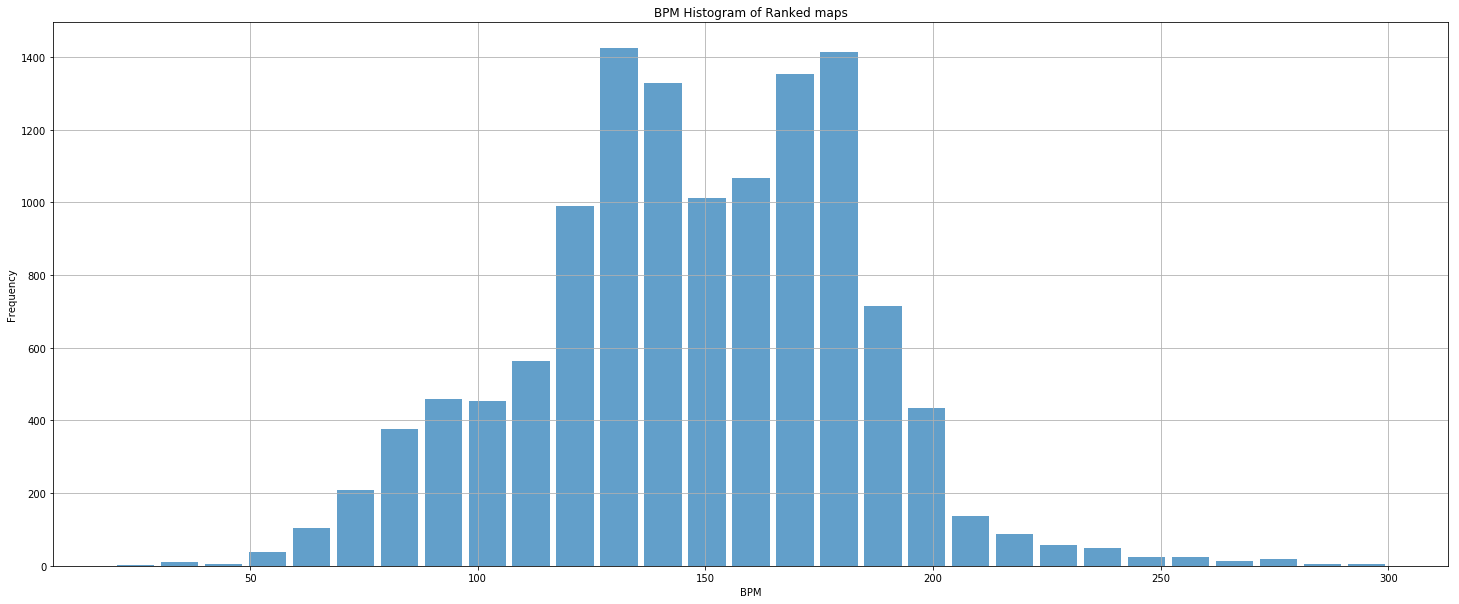

In [6]:
_ = entries.hist(column='avg_bpm', bins=np.linspace(20, 300, 30), alpha=0.7, rwidth=0.85)
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.title('BPM Histogram of Ranked maps')

# Song duration distribution

(0, 500)

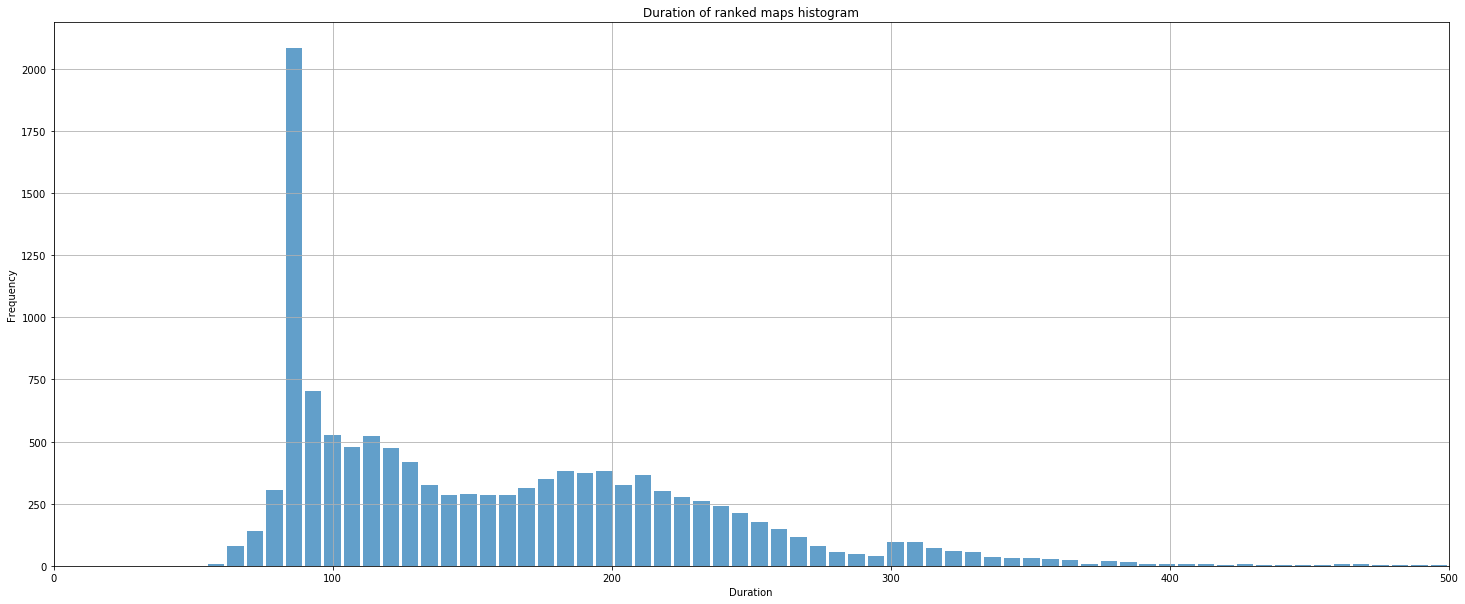

In [7]:
_ = (entries['time_total'] / 1000).hist(bins=np.linspace(20, 500, 70), alpha=0.7, rwidth=0.85)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration of ranked maps histogram')
plt.xlim(0, 500)

# Balanced BPM Dataset construction

In [8]:
n_buckets = 30
buckets = np.linspace(30, 300, n_buckets)
bucket_labels = np.arange(n_buckets - 1)
bucket_ranges = list(zip(buckets[:-1], buckets[1:]))
print(list(zip(zip(buckets[:-1].astype(int), buckets[1:].astype(int)),bucket_labels)))

[((30, 39), 0), ((39, 48), 1), ((48, 57), 2), ((57, 67), 3), ((67, 76), 4), ((76, 85), 5), ((85, 95), 6), ((95, 104), 7), ((104, 113), 8), ((113, 123), 9), ((123, 132), 10), ((132, 141), 11), ((141, 151), 12), ((151, 160), 13), ((160, 169), 14), ((169, 178), 15), ((178, 188), 16), ((188, 197), 17), ((197, 206), 18), ((206, 216), 19), ((216, 225), 20), ((225, 234), 21), ((234, 244), 22), ((244, 253), 23), ((253, 262), 24), ((262, 272), 25), ((272, 281), 26), ((281, 290), 27), ((290, 300), 28)]


In [9]:
entries['bpm_class'] = pd.cut(entries['avg_bpm'], buckets, labels=bucket_labels)
entries.head()

,Unnamed: 0,title,artist,creator,folder_name,audio_file,osu_file,beatmap_id,set_id,time_total,avg_bpm,bpm_class
0,0,Cinderella,(Dj SASA Remix) Tattoo Colour,orioncomet,9204 (Dj SASA Remix) Tattoo Colour - Cinderella,Dj SASA Remix Tattoo Colour -Cinderella.mp3,(Dj SASA Remix) Tattoo Colour - Cinderella (or...,37011,9204,184027,120.001979,9
1,4,crepuscular rays,(K)NoW_NAME,Realazy,642706 (K)NoW_NAME - crepuscular rays,audio.mp3,(K)NoW_NAME - crepuscular rays (Realazy) [ashe...,1362551,642706,113567,180.000000,16
2,5,Dyshi so mnoy,[AMATORY],Sieg,353338 [AMATORY] - Dyshi so mnoy,soft-sliderslide2.mp3,[AMATORY] - Dyshi so mnoy (Sieg) [Auxent's Lig...,865083,353338,190167,94.481161,6
3,7,Novyj geroj,[AMATORY],Sieg,487843 [AMATORY] - Novyj geroj,audio.mp3,[AMATORY] - Novyj geroj (Sieg) [FCL's Insane].osu,1065491,487843,128437,174.000000,15
4,12,Crescendo,_yoc,lesjuh,10033 _yoc - Crescendo,009. - Crescendo.mp3,_yoc - Crescendo (lesjuh) [happy30].osu,39421,10033,236179,188.780488,17


In [10]:
start_bucket = 4
end_bucket = 18
filtered_entries = entries.loc[(entries['bpm_class'] >= start_bucket) & (entries['bpm_class'] <= end_bucket)]

(67.24137931034483, 206.8965517241379)

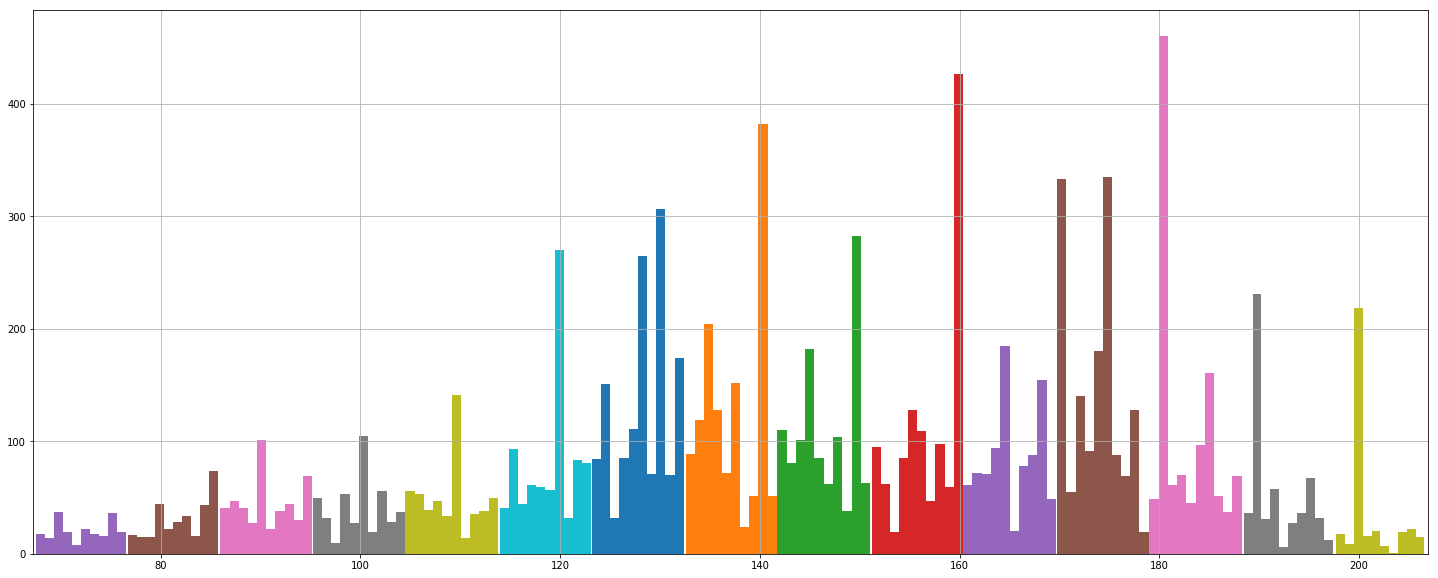

In [11]:
grouped_entries = filtered_entries.groupby('bpm_class')
_ = grouped_entries.avg_bpm.hist()
plt.xlim(bucket_ranges[start_bucket][0], bucket_ranges[end_bucket][1])

In [12]:
group_select_count = grouped_entries.size()[grouped_entries.size() > 0].min()
group_select_count

207

bpm_class
0       0
1       0
2       0
3       0
4     207
5     207
6     207
7     207
8     207
9     207
10    207
11    207
12    207
13    207
14    207
15    207
16    207
17    207
18    207
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
dtype: int64


(67.24137931034483, 206.8965517241379)

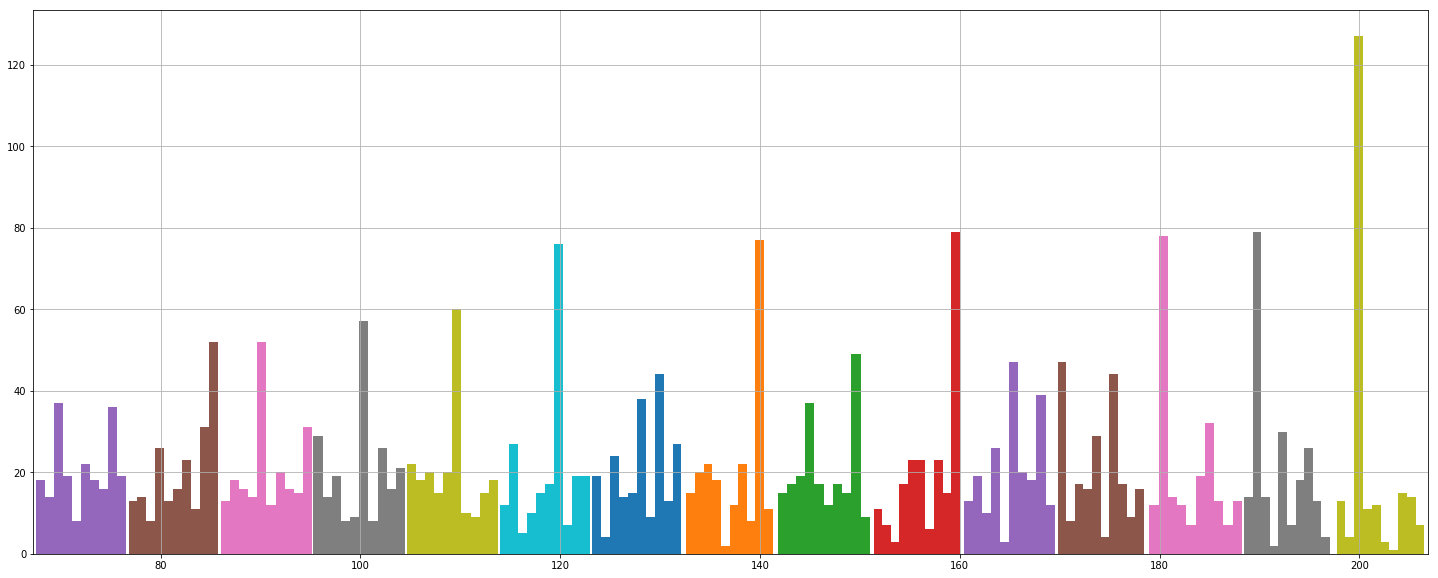

In [21]:
balanced_entries = grouped_entries.apply(lambda x: x.sample(group_select_count) if len(x) > 0 else x)
balanced_entries.reset_index(drop=True, inplace=True)
balanced_entries.drop(columns=['Unnamed: 0'], inplace=True)

print(balanced_entries.groupby('bpm_class').size())
_ = balanced_entries.groupby('bpm_class').avg_bpm.hist()
plt.xlim(bucket_ranges[start_bucket][0], bucket_ranges[end_bucket][1])

In [22]:
balanced_entries.head()

,title,artist,creator,folder_name,audio_file,osu_file,beatmap_id,set_id,time_total,avg_bpm,bpm_class
0,A Tear of Vermilion -memoria-,Falcom Sound Team jdk,Adol Christin,308815 Falcom Sound Team jdk - A Tear of Vermi...,218-a-tear-of-vermillion-memoria-.mp3,Falcom Sound Team jdk - A Tear of Vermilion -m...,730172,308815,102285,70.000000,4
1,Yoru no Himawari,Ryo,kiddly,102653 Ryo - Yoru no Himawari,bgm017.mp3,Ryo - Yoru no Himawari (kiddly) [Easy].osu,271087,102653,157730,76.298283,4
2,Hold Me Down,Mr.Kitty,YellowManul,338716 MrKitty - Hold Me Down,Mr.Kitty - Hold Me Down.mp3,Mr.Kitty - Hold Me Down (YellowManul) [Dark].osu,749349,338716,145836,67.500000,4
3,Kanade ~TV size ver.~,Amamiya Sora,YoshinoSakura,176339 Amamiya Sora - Kanade ~TV size ver~,130386111.mp3,Amamiya Sora - Kanade ~TV size ver.~ (YoshinoS...,425075,176339,106657,73.462156,4
4,Mendes,Humanoid,alvisto,16035 Humanoid - Mendes,05 MENDES.mp3,Humanoid - Mendes (alvisto) [Another].osu,57682,16035,106749,76.363636,4
